In [136]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split


# Load your data
data = pd.read_csv('data.csv')
data['ds'] = pd.to_datetime(data['date'])
data = data.rename(columns={'ggr': 'y'})

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True) 

data['holiday'] = data['holiday'].astype(float) 
data['day_of_week'] = data['day_of_week'].astype(float)
data['month_of_year'] = data['month_of_year'].astype(float) 
data['day_of_month'] = data['day_of_month'].astype(float) 

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:45 - cmdstanpy - INFO - Chain [1] done processing
19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:45 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:46 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1]

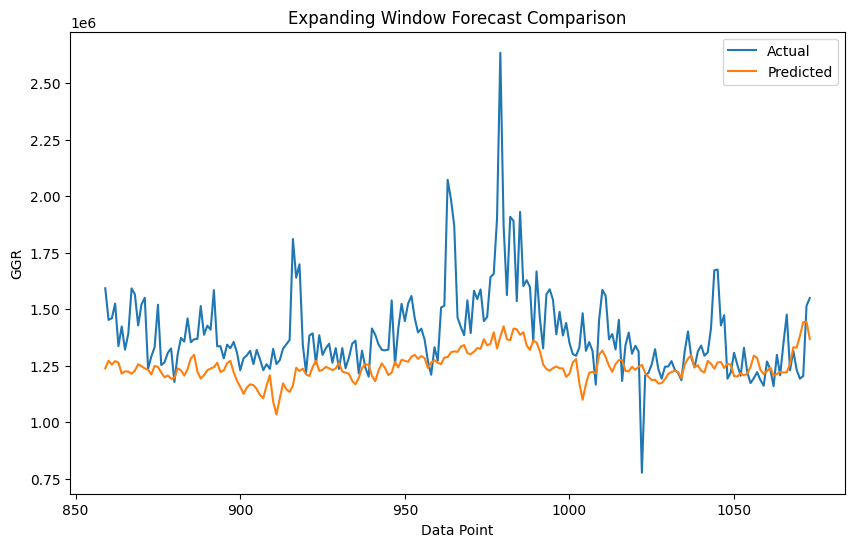

Average MAPE: 10.82679393497211% 
Average NRMSE: 0.0614713867967956


In [132]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define the minimum training size and total data length
min_train_size = int(0.8 * len(train_data))

# Store metrics
predictions = []
actuals = []
mape_scores = []
nrmse_scores = []

for i in range(min_train_size, len(train_data)):
    train_data_val = train_data.iloc[:i]
    test_data_val = train_data.iloc[i:i+1]  # Predict one step ahead

    # Initialize the Prophet model
    model = Prophet(growth='flat')
    model.add_regressor('holiday')
    model.add_regressor('day_of_week')
    model.add_regressor('month_of_year')
    model.add_regressor('day_of_month')
    model.add_seasonality(name='weekly', period=93, fourier_order=30)  

    # Fit the model
    model.fit(train_data_val)

    # Make predictions
    future = test_data_val.drop('y', axis=1)
    forecast = model.predict(future)
    
    # Collect the predicted and actual values
    y_pred = forecast['yhat'].values[0]
    y_true = test_data_val['y'].values[0]
    
    predictions.append(y_pred)
    actuals.append(y_true)

    # Calculate and store error metrics
    mape_scores.append(mean_absolute_percentage_error([y_true], [y_pred]) * 100)
    nrmse_scores.append(np.sqrt(mean_squared_error([y_true], [y_pred]))/ (data['y'].max() - data['y'].min()))

# Plot actuals vs predictions
plt.figure(figsize=(10, 6))
plt.plot(range(min_train_size, len(train_data)), actuals, label='Actual')
plt.plot(range(min_train_size, len(train_data)), predictions, label='Predicted')
plt.legend()
plt.title('Expanding Window Forecast Comparison')
plt.xlabel('Data Point')
plt.ylabel('GGR')
plt.show()

# Print average MAPE and RMSE
print(f"Average MAPE: {np.mean(mape_scores)}% \nAverage NRMSE: {np.mean(nrmse_scores)}")


In [133]:
# Split the data
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Initialize the Prophet model
model = Prophet(growth='flat')
model.add_regressor('holiday')
model.add_regressor('day_of_week')
model.add_regressor('month_of_year')
model.add_regressor('day_of_month')
model.add_seasonality(name='weekly', period=93, fourier_order=30)  


# Fit the model
model.fit(train_data)


19:22:15 - cmdstanpy - INFO - Chain [1] start processing
19:22:15 - cmdstanpy - INFO - Chain [1] done processing


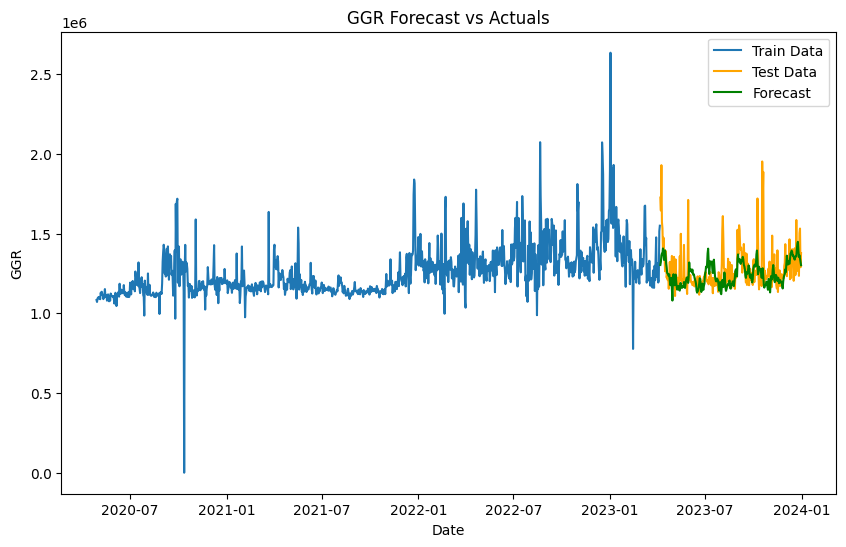

MAPE: 6.232120839284172% 
NRMSE: 0.04927177354850662


In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Prepare future dataframe for prediction 
future = test_data.drop('y', axis=1)
forecast = model.predict(future)

# Evaluate model performance
y_true = test_data['y']
y_pred = forecast['yhat']

mape = mean_absolute_percentage_error(y_true, y_pred) * 100
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
nrmse = rmse / (data['y'].max() - data['y'].min())


# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data')
plt.plot(test_data['ds'], y_true, label='Test Data', color='orange')
plt.plot(test_data['ds'], y_pred, label='Forecast', color='green')
plt.title('GGR Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('GGR')
plt.legend()
plt.show()

print(f"MAPE: {mape}% \nNRMSE: {nrmse}")

In [135]:
import pickle

# Save the model with pickle
with open('prophet_model.pkl', 'wb') as file:
    pickle.dump(model, file)